<a href="https://colab.research.google.com/github/KAVIESH/P122/blob/main/P122_Alphabet_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X = np.load('image.npz')['arr_0']
y = pd.read_csv("labels.csv")["labels"]
print(pd.Series(y).value_counts())
classes = ['A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J', "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
nclasses = len(classes)

Q    550
L    550
E    550
Y    550
M    550
U    550
G    550
B    550
F    550
A    550
S    550
N    550
C    550
R    550
V    550
Z    550
K    550
J    550
P    550
O    550
I    550
W    550
D    550
H    550
X    550
T    550
Name: labels, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, train_size=3500, test_size=500)

X_train_scaled = X_train /255
X_test_scaled = X_test / 255

In [ ]:
clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy is :- ",accuracy)

The accuracy is :-  0.944


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


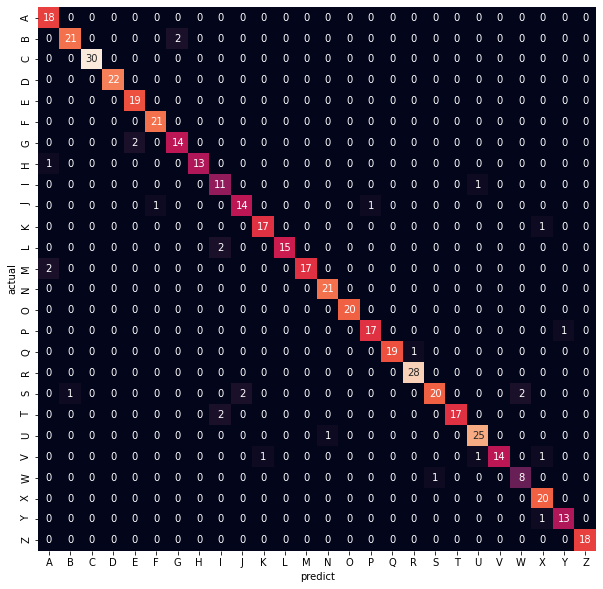

In [ ]:
cm = pd.crosstab(y_test, y_pred, rownames=["actual"], colnames = ["predict"])
p = plt.figure(figsize=(10,10))
p = sns.heatmap(cm, annot = True, fmt = "d", cbar = False)
